# Multiple Regression for Housing Price Prediction

## Objective
To use multiple regression to predict housing prices based on various housing features.



## Key Concepts
- **Feature Selection:** Identifying which features are most relevant to the prediction.
- **Multiple Regression Model:** A model that uses multiple independent variables to predict an outcome.
- **Model Evaluation:** Using metrics like R-squared and Mean Squared Error to assess the performance of the model.


## Practical Example: Housing Price Prediction

Given a dataset with housing features, we aim to predict the price of houses.


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# Load the housing dataset
housing_data = pd.read_csv('./datasets/housing.csv')

In [15]:
housing_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [16]:
# Drop the Address field as it's textual and not useful for regression without further processing
housing_data = housing_data.drop('Address', axis=1)

In [17]:
# Feature matrix and target vector
X = housing_data.drop('Price', axis=1)  # We assume 'Price' is the column we want to predict
y = housing_data['Price']

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
# Initialize the multiple regression model
multi_reg_model = LinearRegression()

In [20]:
# Fit the model to the training data
multi_reg_model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the housing prices on the test set
y_pred = multi_reg_model.predict(X_test)

In [25]:
# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 10068422549.4956
R-squared: 0.9146818498916276


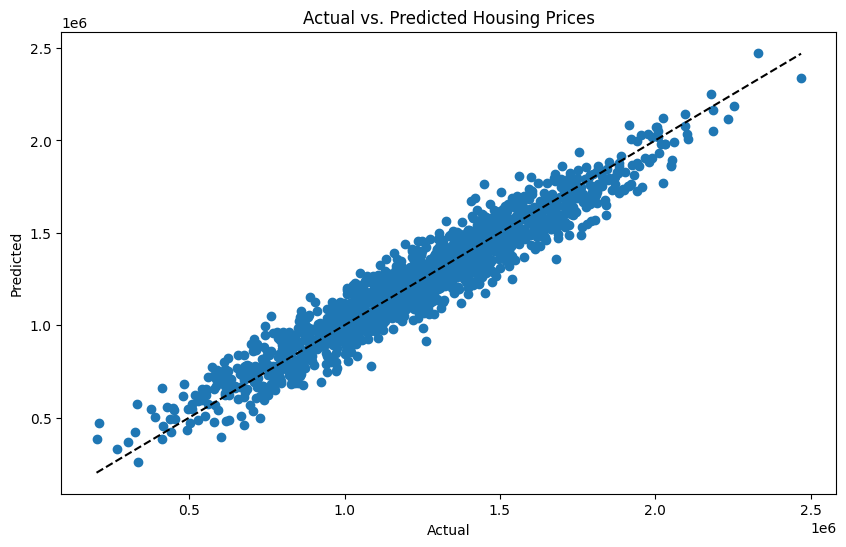

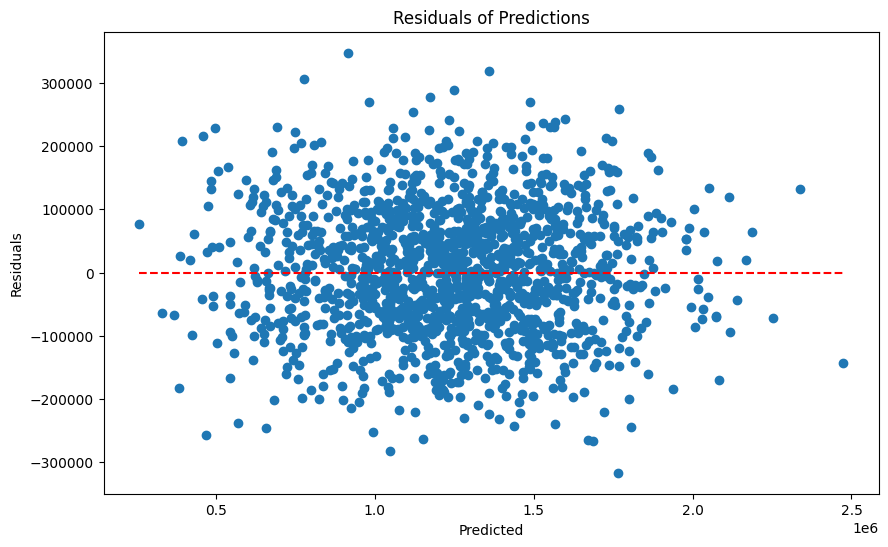

In [27]:
import matplotlib.pyplot as plt

# Predict the housing prices on the test set
y_pred = multi_reg_model.predict(X_test)

# Plotting the actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Housing Prices')
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, c='blue')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()


The first plot shows a scatter plot of actual vs. predicted housing prices. Ideally, the points should fall along the diagonal line if the predictions are perfect. The second plot, the residuals plot, helps in understanding the variance in the predictions. Residuals are the differences between the actual and predicted values. If the model is performing well, the residuals should be randomly scattered around the horizontal line (y=0).